In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.stats import pearsonr

In [3]:
goalkeepers = pd.read_csv("D:/Users/theo/Documents/PL_goalkeepers.csv", delimiter=';')
teams = pd.read_csv("D:/Users/theo/Documents/PL_teams.csv", delimiter=';')
goalkeepers

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,...,pass_AvgLen,goal_kicks_attempted,goal_kicks_long%,goal_kick_AvgLen,crosses_faced,crosses_stopped,crosses_stopped%,#defensive_actions_OPA,#defensive_actions_OPA/90,da_OPA_AvgDist
0,1,Alisson,BRA,GK,Liverpool,30-082,1992,14.0,17,2,...,27.3,73,26.0,31.3,151,5,3.3,25,1.79,19.3
1,2,Alphonse Areola,FRA,GK,West Ham,29-299,1993,1.2,2,1,...,35.0,10,60.0,42.5,15,0,0.0,1,0.84,14.3
2,3,Kepa Arrizabalaga,ESP,GK,Chelsea,28-081,1994,5.5,5,0,...,29.1,47,44.7,33.5,71,2,2.8,17,3.09,20.2
3,4,Gavin Bazunu,IRL,GK,Southampton,20-306,2002,15.0,27,0,...,39.6,108,66.7,50.4,220,20,9.1,25,1.67,14.8
4,5,Asmir Begovic,BIH,GK,Everton,35-186,1987,1.0,0,0,...,34.9,8,62.5,46.8,23,1,4.3,0,0.00,5.0
5,6,Ederson,BRA,GK,Manchester City,29-128,1993,14.0,14,2,...,26.8,63,20.6,29.4,107,11,10.3,21,1.50,17.2
6,7,Lukasz Fabianski,POL,GK,West Ham,37-249,1985,13.8,15,1,...,37.2,89,50.6,39.4,185,13,7.0,4,0.29,11.4
7,8,David de Gea,ESP,GK,Manchester Utd,32-046,1990,14.0,20,1,...,33.1,81,71.6,51.8,213,8,3.8,12,0.86,14.2
8,9,Vicente Guaita,ESP,GK,Crystal Palace,35-347,1987,14.0,18,0,...,30.5,114,40.4,32.6,213,17,8.0,19,1.36,13.8
9,10,Dean Henderson,ENG,GK,Nottingham Forest,25-286,1997,15.0,30,2,...,38.0,136,54.4,43.4,247,15,6.1,22,1.47,15.4


In [4]:
goalkeepers = goalkeepers[goalkeepers['90s'] >= 7]
goalkeepers['PSxG_difference_per_PSxG'] = goalkeepers['PSxG+/-']/goalkeepers['PSxG']
goalkeepers

<ipython-input-4-18942942206f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalkeepers['PSxG_difference_per_PSxG'] = goalkeepers['PSxG+/-']/goalkeepers['PSxG']


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,...,goal_kicks_attempted,goal_kicks_long%,goal_kick_AvgLen,crosses_faced,crosses_stopped,crosses_stopped%,#defensive_actions_OPA,#defensive_actions_OPA/90,da_OPA_AvgDist,PSxG_difference_per_PSxG
0,1,Alisson,BRA,GK,Liverpool,30-082,1992,14.0,17,2,...,73,26.0,31.3,151,5,3.3,25,1.79,19.3,0.308943
3,4,Gavin Bazunu,IRL,GK,Southampton,20-306,2002,15.0,27,0,...,108,66.7,50.4,220,20,9.1,25,1.67,14.8,-0.382979
5,6,Ederson,BRA,GK,Manchester City,29-128,1993,14.0,14,2,...,63,20.6,29.4,107,11,10.3,21,1.50,17.2,-0.101695
6,7,Lukasz Fabianski,POL,GK,West Ham,37-249,1985,13.8,15,1,...,89,50.6,39.4,185,13,7.0,4,0.29,11.4,0.130435
7,8,David de Gea,ESP,GK,Manchester Utd,32-046,1990,14.0,20,1,...,81,71.6,51.8,213,8,3.8,12,0.86,14.2,-0.226994
8,9,Vicente Guaita,ESP,GK,Crystal Palace,35-347,1987,14.0,18,0,...,114,40.4,32.6,213,17,8.0,19,1.36,13.8,-0.075949
9,10,Dean Henderson,ENG,GK,Nottingham Forest,25-286,1997,15.0,30,2,...,136,54.4,43.4,247,15,6.1,22,1.47,15.4,-0.158301
10,11,Bernd Leno,GER,GK,Fulham,30-294,1992,13.0,24,3,...,88,34.1,33.7,167,14,8.4,19,1.46,15.1,0.024390
11,12,Hugo Lloris,FRA,GK,Tottenham,35-362,1986,15.0,21,1,...,119,21.0,24.3,186,12,6.5,20,1.33,14.4,-0.160221
12,13,Emiliano Martinez,ARG,GK,Aston Villa,30-112,1992,14.4,18,1,...,93,51.6,42.6,176,26,14.8,7,0.49,10.9,-0.013514


In [5]:
teams

,Rk,Squad,Matches_Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points,...,xG,xGAgainst,xGDifference,xGDifference/90,Passes_Completed,build_up_attacks,PPDA,High_Turnovers,Possession,Passes_per_Possession
0,1.0,Arsenal,14.0,12.0,1.0,1.0,33.0,11.0,22.0,37.0,...,26.2,11.8,14.3,1.02,6539.0,54.0,11.4,130.0,57.8,113.131488
1,2.0,Manchester City,14.0,10.0,2.0,2.0,40.0,14.0,26.0,32.0,...,27.6,11.2,16.4,1.17,8891.0,91.0,12.6,150.0,66.1,134.508321
2,3.0,Newcastle Utd,15.0,8.0,6.0,1.0,29.0,11.0,18.0,30.0,...,24.3,14.3,9.9,0.66,5337.0,26.0,11.0,151.0,50.7,105.266272
3,4.0,Tottenham,15.0,9.0,2.0,4.0,31.0,21.0,10.0,29.0,...,24.1,16.5,7.6,0.50,6701.0,46.0,14.5,102.0,50.5,132.693069
4,5.0,Manchester Utd,14.0,8.0,2.0,4.0,20.0,20.0,0.0,26.0,...,18.8,17.3,1.5,0.11,5747.0,38.0,14.7,106.0,52.0,110.519231
5,6.0,Liverpool,14.0,6.0,4.0,4.0,28.0,17.0,11.0,22.0,...,24.2,19.5,4.7,0.34,7528.0,58.0,12.3,123.0,62.1,121.223833
6,7.0,Brighton,14.0,6.0,3.0,5.0,23.0,19.0,4.0,21.0,...,21.5,15.9,5.6,0.40,6145.0,50.0,11.7,123.0,55.4,110.920578
7,8.0,Chelsea,14.0,6.0,3.0,5.0,17.0,17.0,0.0,21.0,...,15.4,19.3,-3.9,-0.28,6721.0,39.0,10.1,126.0,58.1,115.679862
8,9.0,Fulham,15.0,5.0,4.0,6.0,24.0,26.0,-2.0,19.0,...,19.6,27.3,-7.6,-0.51,5004.0,17.0,15.5,101.0,45.7,109.496718
9,10.0,Brentford,15.0,4.0,7.0,4.0,23.0,25.0,-2.0,19.0,...,20.3,20.3,0.0,0.00,4608.0,13.0,13.6,111.0,44.7,103.087248


In [6]:
#teams['PPDA'] = teams['PPDA'].apply(lambda x: 1/x)
teams.dropna()

,Rk,Squad,Matches_Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points,...,xG,xGAgainst,xGDifference,xGDifference/90,Passes_Completed,build_up_attacks,PPDA,High_Turnovers,Possession,Passes_per_Possession
0,1.0,Arsenal,14.0,12.0,1.0,1.0,33.0,11.0,22.0,37.0,...,26.2,11.8,14.3,1.02,6539.0,54.0,11.4,130.0,57.8,113.131488
1,2.0,Manchester City,14.0,10.0,2.0,2.0,40.0,14.0,26.0,32.0,...,27.6,11.2,16.4,1.17,8891.0,91.0,12.6,150.0,66.1,134.508321
2,3.0,Newcastle Utd,15.0,8.0,6.0,1.0,29.0,11.0,18.0,30.0,...,24.3,14.3,9.9,0.66,5337.0,26.0,11.0,151.0,50.7,105.266272
3,4.0,Tottenham,15.0,9.0,2.0,4.0,31.0,21.0,10.0,29.0,...,24.1,16.5,7.6,0.50,6701.0,46.0,14.5,102.0,50.5,132.693069
4,5.0,Manchester Utd,14.0,8.0,2.0,4.0,20.0,20.0,0.0,26.0,...,18.8,17.3,1.5,0.11,5747.0,38.0,14.7,106.0,52.0,110.519231
5,6.0,Liverpool,14.0,6.0,4.0,4.0,28.0,17.0,11.0,22.0,...,24.2,19.5,4.7,0.34,7528.0,58.0,12.3,123.0,62.1,121.223833
6,7.0,Brighton,14.0,6.0,3.0,5.0,23.0,19.0,4.0,21.0,...,21.5,15.9,5.6,0.40,6145.0,50.0,11.7,123.0,55.4,110.920578
7,8.0,Chelsea,14.0,6.0,3.0,5.0,17.0,17.0,0.0,21.0,...,15.4,19.3,-3.9,-0.28,6721.0,39.0,10.1,126.0,58.1,115.679862
8,9.0,Fulham,15.0,5.0,4.0,6.0,24.0,26.0,-2.0,19.0,...,19.6,27.3,-7.6,-0.51,5004.0,17.0,15.5,101.0,45.7,109.496718
9,10.0,Brentford,15.0,4.0,7.0,4.0,23.0,25.0,-2.0,19.0,...,20.3,20.3,0.0,0.00,4608.0,13.0,13.6,111.0,44.7,103.087248


In [7]:
df = pd.merge(goalkeepers, teams, on="Squad")

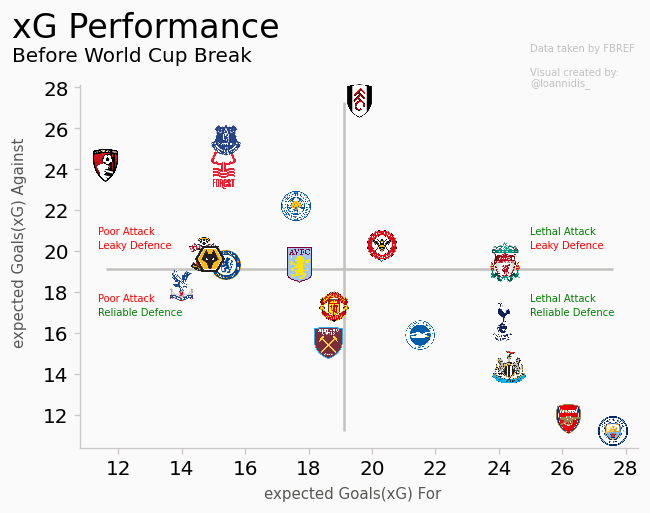

In [16]:
plt.rcParams.update({'font.family':'DejaVu Sans'})
bgcol = '#fafafa'
plt.frameon=False
plt.autoscale=True
# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(teams['xG'], teams['xGAgainst'], c=bgcol)

# Change plot spines
#ccc8c8
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(Squad):
    return OffsetImage(plt.imread('D:/Users/theo/Documents/images/' + Squad +'.png'), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['Squad']), (row['xG'], row['xGAgainst']), frameon=False)
    ax.add_artist(ab)

# Add average lines
#c2c1c0
plt.hlines(teams['xGAgainst'].mean(), teams['xG'].min(), teams['xG'].max(), color='#c2c1c0')
plt.vlines(teams['xG'].mean(), teams['xGAgainst'].min(), teams['xGAgainst'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.03,.98,'xG Performance',size=20)
fig.text(.03,.93,"Before World Cup Break", size=12)

## Avg line explanation
#575654
fig.text(.03,.34,'expected Goals(xG) Against', size=9, color='#575654',rotation=90)
fig.text(.38,0.02,'expected Goals(xG) For', size=9, color='#575654')

## Axes titles
fig.text(.75,.90,'Visual created by:', size=6, color='#c2c1c0')
fig.text(.75,.88,'@Ioannidis_', size=6, color='#c2c1c0')
fig.text(.75,.95,'Data taken by FBREF', size=6, color='#c2c1c0')
fig.text(.75,.57,'Lethal Attack', size=6, color='green')
fig.text(.75,.54,'Leaky Defence', size=6, color='red')
fig.text(.15,.57,'Poor Attack', size=6, color='red')
fig.text(.15,.54,'Leaky Defence', size=6, color='red')
fig.text(.15,.43,'Poor Attack', size=6, color='red')
fig.text(.15,.40,'Reliable Defence', size=6, color='green')
fig.text(.75,.43,'Lethal Attack', size=6, color='green')
fig.text(.75,.40,'Reliable Defence', size=6, color='green')
#fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('xGPlot.png', dpi=1200, bbox_inches = "tight")

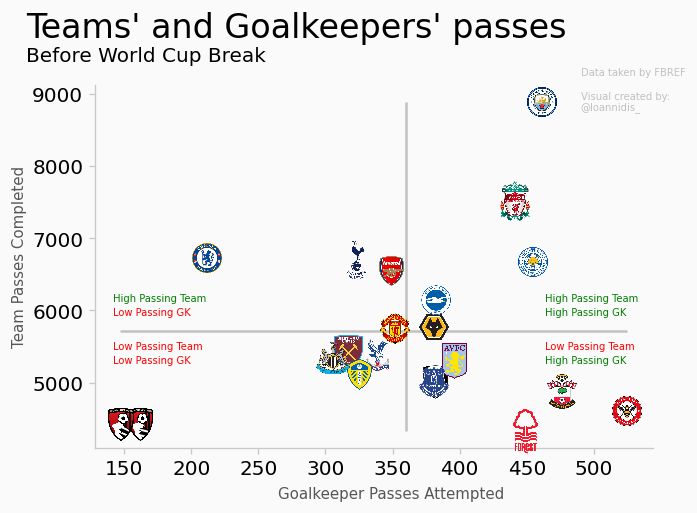

In [66]:
plt.rcParams.update({'font.family':'DejaVu Sans'})
bgcol = '#fafafa'
plt.frameon=False
plt.autoscale=True
# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['passes_attempted'], df['Passes_Completed'], c=bgcol)

# Change plot spines
#ccc8c8
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(Squad):
    return OffsetImage(plt.imread('D:/Users/theo/Documents/images/' + Squad +'.png'), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['Squad']), (row['passes_attempted'], row['Passes_Completed']), frameon=False)
    ax.add_artist(ab)

# Add average lines
#c2c1c0
plt.hlines(df['Passes_Completed'].mean(), df['passes_attempted'].min(), df['passes_attempted'].max(), color='#c2c1c0')
plt.vlines(df['passes_attempted'].mean(), df['Passes_Completed'].min(), df['Passes_Completed'].max(), color='#c2c1c0')
#plt.xlim(0,600)
# Text

## Title & comment
fig.text(.03,.98,"Teams' and Goalkeepers' passes",size=20)
fig.text(.03,.93,"Before World Cup Break", size=12)

## Avg line explanation
#575654
fig.text(.01,.34,'Team Passes Completed', size=9, color='#575654',rotation=90)
fig.text(.38,0.02,'Goalkeeper Passes Attempted', size=9, color='#575654')

## Axes titles
fig.text(.8,.85,'Visual created by:', size=6, color='#c2c1c0')
fig.text(.8,.83,'@Ioannidis_', size=6, color='#c2c1c0')
fig.text(.8,.9,'Data taken by FBREF', size=6, color='#c2c1c0')
fig.text(.75,.43,'High Passing Team', size=6, color='green')
fig.text(.75,.4,'High Passing GK', size=6, color='green')
fig.text(.15,.43,'High Passing Team', size=6, color='green')
fig.text(.15,.4,'Low Passing GK', size=6, color='red')
fig.text(.15,.33,'Low Passing Team', size=6, color='red')
fig.text(.15,.30,'Low Passing GK', size=6, color='red')
fig.text(.75,.33,'Low Passing Team', size=6, color='red')
fig.text(.75,.30,'High Passing GK', size=6, color='green')
#fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('passPlot.png', dpi=1200, bbox_inches = "tight")

In [11]:
corr = df[['Passes_Completed','passes_attempted']].corr()
print(corr)

                  Passes_Completed  passes_attempted
Passes_Completed          1.000000          0.230933
passes_attempted          0.230933          1.000000


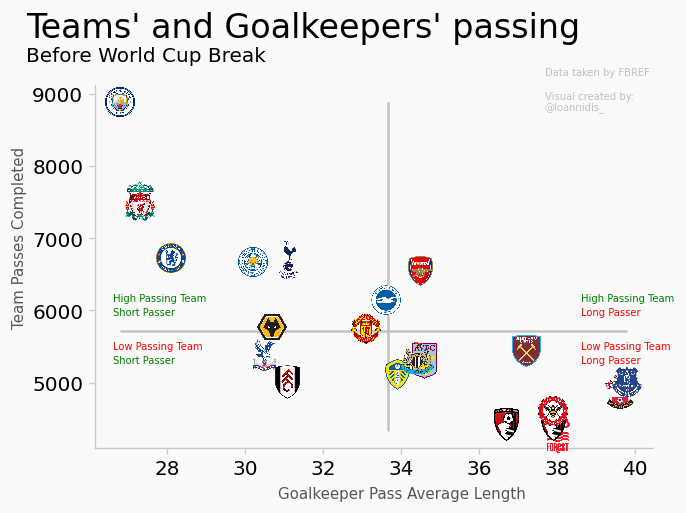

In [64]:
plt.rcParams.update({'font.family':'Helvetica'})
bgcol = '#fafafa'
plt.frameon=False
plt.autoscale=True
# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['pass_AvgLen'], df['Passes_Completed'], c=bgcol)

# Change plot spines
#ccc8c8
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')


# Plot badges
def getImage(Squad):
    return OffsetImage(plt.imread('D:/Users/theo/Documents/images/' + Squad +'.png'), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['Squad']), (row['pass_AvgLen'], row['Passes_Completed']), frameon=False)
    ax.add_artist(ab)

# Add average lines
#c2c1c0
plt.hlines(df['Passes_Completed'].mean(), df['pass_AvgLen'].min(), df['pass_AvgLen'].max(), color='#c2c1c0')
plt.vlines(df['pass_AvgLen'].mean(), df['Passes_Completed'].min(), df['Passes_Completed'].max(), color='#c2c1c0')
#plt.xlim(0,50)
# Text

## Title & comment
fig.text(.03,.98,"Teams' and Goalkeepers' passing",size=20)
fig.text(.03,.93,"Before World Cup Break", size=12)

## Avg line explanation
#575654
fig.text(.01,.38,'Team Passes Completed', size=9, color='#575654',rotation=90)
fig.text(.38,0.02,'Goalkeeper Pass Average Length', size=9, color='#575654')

## Axes titles
fig.text(.75,.85,'Visual created by:', size=6, color='#c2c1c0')
fig.text(.75,.83,'@Ioannidis_', size=6, color='#c2c1c0')
fig.text(.75,.9,'Data taken by FBREF', size=6, color='#c2c1c0')
fig.text(.8,.43,'High Passing Team', size=6, color='green')
fig.text(.8,.4,'Long Passer', size=6, color='red')
fig.text(.15,.43,'High Passing Team', size=6, color='green')
fig.text(.15,.4,'Short Passer', size=6, color='green')
fig.text(.15,.33,'Low Passing Team', size=6, color='red')
fig.text(.15,.3,'Short Passer', size=6, color='green')
fig.text(.8,.33,'Low Passing Team', size=6, color='red')
fig.text(.8,.3,'Long Passer', size=6, color='red')
#fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('passPlotCorrect.png', dpi=1200, bbox_inches = "tight")

In [12]:
corr = df[['Passes_Completed','pass_AvgLen']].corr()
print(corr)

                  Passes_Completed  pass_AvgLen
Passes_Completed          1.000000    -0.800876
pass_AvgLen              -0.800876     1.000000


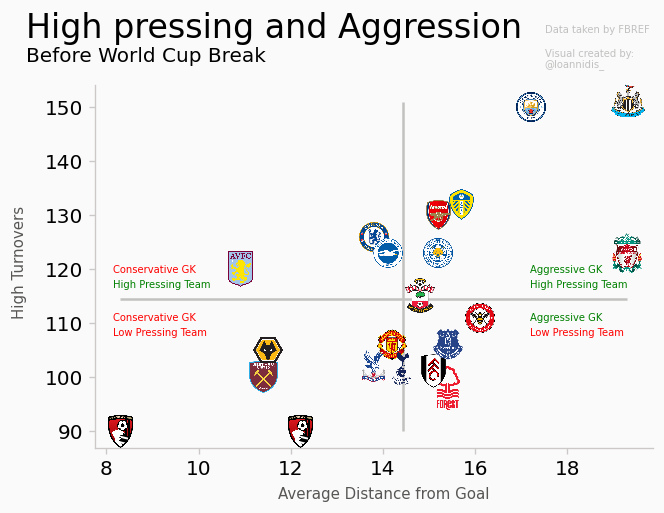

In [27]:
plt.rcParams.update({'font.family':'DejaVu Sans'})
bgcol = '#fafafa'
plt.frameon=False
plt.autoscale=True
# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['da_OPA_AvgDist'], df['High_Turnovers'], c=bgcol)

# Change plot spines
#ccc8c8
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(Squad):
    return OffsetImage(plt.imread('D:/Users/theo/Documents/images/' + Squad +'.png'), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['Squad']), (row['da_OPA_AvgDist'], row['High_Turnovers']), frameon=False)
    ax.add_artist(ab)

# Add average lines
#c2c1c0
plt.hlines(df['High_Turnovers'].mean(), df['da_OPA_AvgDist'].min(), df['da_OPA_AvgDist'].max(), color='#c2c1c0')
plt.vlines(df['da_OPA_AvgDist'].mean(), df['High_Turnovers'].min(), df['High_Turnovers'].max(), color='#c2c1c0')
#plt.xlim(0,600)
# Text

## Title & comment
fig.text(.03,.98,"High pressing and Aggression",size=20)
fig.text(.03,.93,"Before World Cup Break", size=12)

## Avg line explanation
#575654
fig.text(.01,.4,'High Turnovers', size=9, color='#575654',rotation=90)
fig.text(.38,0.02,'Average Distance from Goal', size=9, color='#575654')

## Axes titles
fig.text(.75,.94,'Visual created by:', size=6, color='#c2c1c0')
fig.text(.75,.92,'@Ioannidis_', size=6, color='#c2c1c0')
fig.text(.75,.99,'Data taken by FBREF', size=6, color='#c2c1c0')
fig.text(.73,.46,'High Pressing Team', size=6, color='green')
fig.text(.73,.49,'Aggressive GK', size=6, color='green')
fig.text(.15,.49,'Conservative GK', size=6, color='red')
fig.text(.15,.46,'High Pressing Team', size=6, color='green')
fig.text(.15,.39,'Conservative GK', size=6, color='red')
fig.text(.15,.36,'Low Pressing Team', size=6, color='red')
fig.text(.73,.39,'Aggressive GK', size=6, color='green')
fig.text(.73,.36,'Low Pressing Team', size=6, color='red')
#fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('highpressPlot.png', dpi=1200, bbox_inches = "tight")

In [13]:
corr = df[['da_OPA_AvgDist','High_Turnovers']].corr()
print(corr)

                da_OPA_AvgDist  High_Turnovers
da_OPA_AvgDist        1.000000        0.639225
High_Turnovers        0.639225        1.000000


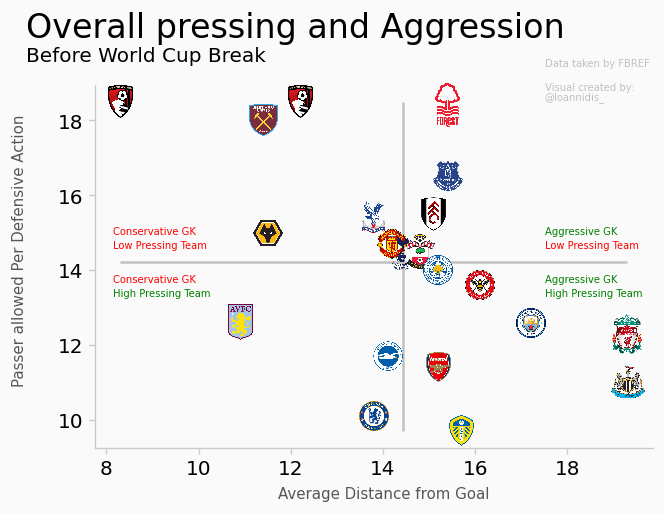

In [28]:
plt.rcParams.update({'font.family':'DejaVu Sans'})
bgcol = '#fafafa'
plt.frameon=False
plt.autoscale=True
# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['da_OPA_AvgDist'], df['PPDA'], c=bgcol)

# Change plot spines
#ccc8c8
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(Squad):
    return OffsetImage(plt.imread('D:/Users/theo/Documents/images/' + Squad +'.png'), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['Squad']), (row['da_OPA_AvgDist'], row['PPDA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
#c2c1c0
plt.hlines(df['PPDA'].mean(), df['da_OPA_AvgDist'].min(), df['da_OPA_AvgDist'].max(), color='#c2c1c0')
plt.vlines(df['da_OPA_AvgDist'].mean(), df['PPDA'].min(), df['PPDA'].max(), color='#c2c1c0')
#plt.xlim(0,600)
# Text

## Title & comment
fig.text(.03,.98,"Overall pressing and Aggression",size=20)
fig.text(.03,.93,"Before World Cup Break", size=12)

## Avg line explanation
#575654
fig.text(.01,.26,'Passer allowed Per Defensive Action', size=9, color='#575654',rotation=90)
fig.text(.38,0.02,'Average Distance from Goal', size=9, color='#575654')

## Axes titles
fig.text(.75,.87,'Visual created by:', size=6, color='#c2c1c0')
fig.text(.75,.85,'@Ioannidis_', size=6, color='#c2c1c0')
fig.text(.75,.92,'Data taken by FBREF', size=6, color='#c2c1c0')
fig.text(.75,.54,'Low Pressing Team', size=6, color='red')
fig.text(.75,.57,'Aggressive GK', size=6, color='green')
fig.text(.15,.57,'Conservative GK', size=6, color='red')
fig.text(.15,.54,'Low Pressing Team', size=6, color='red')
fig.text(.15,.47,'Conservative GK', size=6, color='red')
fig.text(.15,.44,'High Pressing Team', size=6, color='green')
fig.text(.75,.47,'Aggressive GK', size=6, color='green')
fig.text(.75,.44,'High Pressing Team', size=6, color='green')
#fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('overallpressPlot.png', dpi=1200, bbox_inches = "tight")

In [23]:
corr = df[['da_OPA_AvgDist','PPDA']].corr()
print(corr)

                da_OPA_AvgDist      PPDA
da_OPA_AvgDist        1.000000 -0.508529
PPDA                 -0.508529  1.000000


In [24]:
corr = df[['High_Turnovers','PPDA']].corr()
print(corr)

                High_Turnovers      PPDA
High_Turnovers        1.000000 -0.840745
PPDA                 -0.840745  1.000000


In [41]:
corr = df[['High_Turnovers','xGDifference']].corr()
print(corr)

                High_Turnovers  xGDifference
High_Turnovers        1.000000      0.726821
xGDifference          0.726821      1.000000


In [42]:
corr = df[['da_OPA_AvgDist','xGDifference']].corr()
print(corr)

                da_OPA_AvgDist  xGDifference
da_OPA_AvgDist        1.000000      0.506628
xGDifference          0.506628      1.000000


In [43]:
corr = df[['PPDA','xGDifference']].corr()
print(corr)

                  PPDA  xGDifference
PPDA          1.000000     -0.615281
xGDifference -0.615281      1.000000


In [44]:
corr = df[['pass_AvgLen','xGDifference']].corr()
print(corr)

              pass_AvgLen  xGDifference
pass_AvgLen      1.000000     -0.416446
xGDifference    -0.416446      1.000000


In [48]:
corr = df[['Passes_Completed','xGDifference']].corr()
print(corr)

                  Passes_Completed  xGDifference
Passes_Completed           1.00000       0.70681
xGDifference               0.70681       1.00000
